<a href="https://colab.research.google.com/github/Rogerio-mack/SBSI_2024_ts_short_course/blob/main/SCBC_ARMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

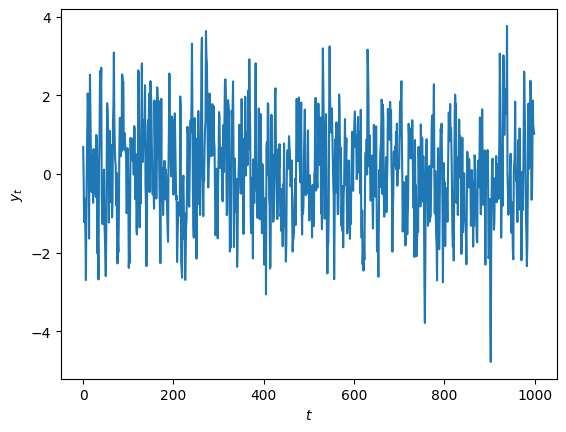

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1408.129
Date:                Thu, 18 Jan 2024   AIC                           2824.259
Time:                        15:42:41   BIC                           2843.890
Sample:                             0   HQIC                          2831.720
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0439      0.070      0.631      0.528      -0.093       0.180
ar.L1          0.4562      0.047      9.648      0.000       0.364       0.549
ma.L1          0.2103      0.052      4.019      0.0

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.arima.model import ARIMA

np.random.seed(878015)

# create simulated ARMA(1,1) dataset
ar_coefs = [1, -0.5] # ar1 = 0.5 -> function used makes us pass in negative
ma_coefs = [1, 0.2] # ma1 = 0.2
sigma = 0.2 # scale of e_t
nsample = 1000

x = np.arange(nsample)
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=nsample)

plt.figure()
plt.plot(x,y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

# fit ARMA model to generated data
model = ARIMA(y, order=(1,0,1))
results = model.fit()
print(results.summary())

# collect fitted parameters
fit_c = results.params[0] # = 0.0088
fit_ar1 = results.arparams[0] # = 0.4563
fit_ma1 = results.maparams[0] # = 0.2102

# make predictions for last 10 time steps
n=10
y_hat_manual = (y[-n-1:-1]-fit_c)*fit_ar1 + results.resid[-n-1:-1]*fit_ma1 + fit_c

# make same predictions using statsmodels and compare
y_hat_sm = results.predict(start=-n, dynamic=False)

pred_resid = y_hat_manual - y_hat_sm
print(abs(pred_resid).max())
# 5.551115123125783e-17

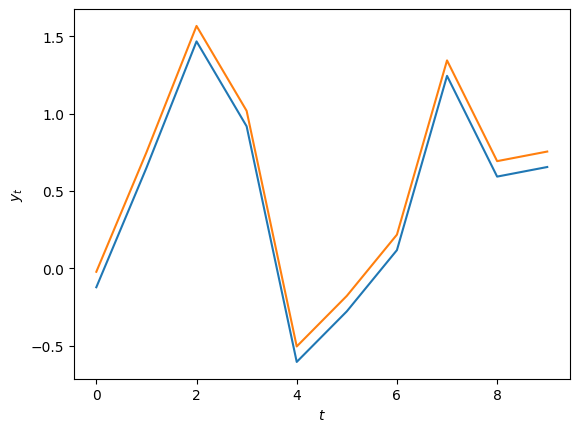

In [8]:
plt.figure()
plt.plot(y_hat_manual)
plt.plot(y_hat_sm+0.1)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()